

# Project: Investigate a Dataset ("No-show appointments dataset")



<a id='intro'></a>
## Introduction

This task is my implementation of the project "Investigate a dataset" This is the 1st project of the "Advanced Data Analyst program of Udacity" the dataset i picked is the "No-show appointments dataset", this dataset gathers information from 100k medical appointments in Brazil and reflects on whether or not patients appear for appointment. What I will discuss is: 
- What are the most significant factors in evaluating the probability of a no-show? And to answer that question: I'm beginning to load the dataset and the python libraries that I need. 
- What's the overall no-show percentage?
- What is the effect of genders on the proportion of no show?
- How does the neighborhood effect and the no-show percentage?
- What is the effect on the no-show ratio of days between the planned date and the assigned date?
- What is the effect on the no show ratio of the day of the week?




I'm going to go through most of the variables in the dataset to analyze the effect of these variables on the percentage of noshow.

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
from matplotlib.artist import Artist
from pandas.plotting import scatter_matrix
from datetime import datetime
import matplotlib.dates as mdates
%matplotlib inline



In [242]:

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No




The first shot at data consistency,I will take a look at the accuracy of the data first.


In [243]:
##This returns the scale of the data frame tuple
df.shape

(110527, 14)

In [244]:
##Returns the data forms of the columns
df.dtypes


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [245]:
##This provides a succinct description of the data frame, including the number of non-zero values in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Both columns have 110527 non-zero values and are equal to the total number of rows but we don't have any nulls anywhere.

In [246]:
##Returns the number of unique values in each column.
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

- AppontmentID has 110527 unique values which are equal to the number of rows so we don't have duplicated rows, and we can see that Gender has two unique values ('F' and 'M'), No-show has two unique values ('Yes' and No').
- There are 81 distinct neighbourhoods and 5 handicap values (0 to 4).
- Scholarship, hypertension, diabetes, alcoholism, and SMS received two possible values of 0 and 1. 
- There are 104 distinct age values that sound like a lot

In [247]:
print(df.describe())


          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

In [248]:
##List qualities that are special in the df['name'] column
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

- There are some old people here, up to 115 years old. 
- There is also a-1 value. A fetus, huh? An unknown age? This is a non-sensical value.

In [249]:
##One row with Age == -1 is removed
df = df.drop(df.index[df.Age == -1])
df.shape

(110526, 14)








A row with age ==-1 is removed. Next, are there really 81 different neighborhoods?

In [250]:
sorted(df.Neighbourhood.unique())

['AEROPORTO',
 'ANDORINHAS',
 'ANTÔNIO HONÓRIO',
 'ARIOVALDO FAVALESSA',
 'BARRO VERMELHO',
 'BELA VISTA',
 'BENTO FERREIRA',
 'BOA VISTA',
 'BONFIM',
 'CARATOÍRA',
 'CENTRO',
 'COMDUSA',
 'CONQUISTA',
 'CONSOLAÇÃO',
 'CRUZAMENTO',
 'DA PENHA',
 'DE LOURDES',
 'DO CABRAL',
 'DO MOSCOSO',
 'DO QUADRO',
 'ENSEADA DO SUÁ',
 'ESTRELINHA',
 'FONTE GRANDE',
 'FORTE SÃO JOÃO',
 'FRADINHOS',
 'GOIABEIRAS',
 'GRANDE VITÓRIA',
 'GURIGICA',
 'HORTO',
 'ILHA DAS CAIEIRAS',
 'ILHA DE SANTA MARIA',
 'ILHA DO BOI',
 'ILHA DO FRADE',
 'ILHA DO PRÍNCIPE',
 'ILHAS OCEÂNICAS DE TRINDADE',
 'INHANGUETÁ',
 'ITARARÉ',
 'JABOUR',
 'JARDIM CAMBURI',
 'JARDIM DA PENHA',
 'JESUS DE NAZARETH',
 'JOANA D´ARC',
 'JUCUTUQUARA',
 'MARIA ORTIZ',
 'MARUÍPE',
 'MATA DA PRAIA',
 'MONTE BELO',
 'MORADA DE CAMBURI',
 'MÁRIO CYPRESTE',
 'NAZARETH',
 'NOVA PALESTINA',
 'PARQUE INDUSTRIAL',
 'PARQUE MOSCOSO',
 'PIEDADE',
 'PONTAL DE CAMBURI',
 'PRAIA DO CANTO',
 'PRAIA DO SUÁ',
 'REDENÇÃO',
 'REPÚBLICA',
 'RESISTÊNCIA',
 'RO

Apparently, in fact, there are 81 different neighborhoods, This concludes our first look at the quality of the data.  During analysis, we may go back to data cleaning when the results reveal the need to do so.

# What's the overall no-show percentage?

Before looking at the influence of different variables on the no-show percentage, we need to know the overall no-show percentage.

In [251]:
def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)

Total =  110526
General no-show =  20 %


F    65.0
M    35.0
Name: Gender, dtype: float64

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


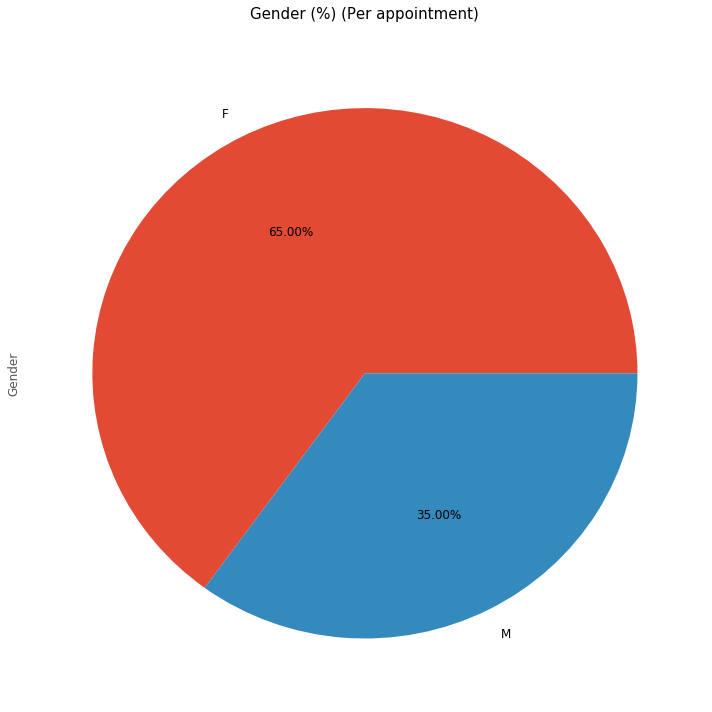

In [252]:
##we need to know the average no-show percentage
total = len(df.index)
print('Total = ', total)
total_noshow = (df['No-show'] == 'Yes').sum()
print('General no-show = ', int((total_noshow / total) * 100), '%')
PropByVar(df, 'Gender')

# What is the effect of genders on the proportion of no show?

In [253]:
##This feature prints a 1d variable analysis
def print_1d_analysis(column_name, value, specific_text):
    total = len(df.index)
    total_value = (df[column_name] == value).sum()
    percent = int((total_value / total) * 100)
    text = ' This is ' + str(percent) + '% of ' + str(total) + ' records.'
    print(str(total_value) + ' ' + specific_text + text)
    
print_1d_analysis('Gender', 'M', 'of the appointments is for a man.')
print_1d_analysis('Gender', 'F', 'of the appointments is for a woman.')



38687 of the appointments is for a man. This is 35% of 110526 records.
71839 of the appointments is for a woman. This is 64% of 110526 records.


In [254]:
def print_noshow_percentage(column_name, value, percentage_text):
    total = (df[column_name] == value).sum()
    noshow = len((df[(df[column_name] == value) & (df['No-show'] == 'Yes')]))
    print(int((noshow / total) * 100), percentage_text)

In [255]:
#Gender
print_noshow_percentage('Gender', 'M', '% of all appointments with a man ')
print_noshow_percentage('Gender', 'F', '% of all appointments with a woman ')


19 % of all appointments with a man 
20 % of all appointments with a woman 


In [256]:
print_1d_analysis('Hipertension', 1, 'of the appointments involves a patient with hipertension.')
print_1d_analysis('Diabetes', 1, 'of the appointments involves a patient with diabetes.')
print_1d_analysis('Alcoholism', 1, 'of the appointments involves a patient with alcoholism.')
print_noshow_percentage('Hipertension', 1, '% of all appointments with someone with hipertension is a no show')
print_noshow_percentage('Diabetes', 1, '% of all appointments with someone with diabetes is a no show')
print_noshow_percentage('Alcoholism', 1, '% of all appointments with someone with alcoholism is a no show')

21801 of the appointments involves a patient with hipertension. This is 19% of 110526 records.
7943 of the appointments involves a patient with diabetes. This is 7% of 110526 records.
3360 of the appointments involves a patient with alcoholism. This is 3% of 110526 records.
17 % of all appointments with someone with hipertension is a no show
18 % of all appointments with someone with diabetes is a no show
20 % of all appointments with someone with alcoholism is a no show


In [257]:
def print_noshow_percentage_given(column_name, value, given_column, given_value):
    total = ((df[column_name] == value) & (df[given_column] == given_value)).sum()
    noshow = len(df[((df[column_name] == value) & (df[given_column] == given_value) & (df['No-show'] == 'Yes'))])
    percentage = int((noshow / total) * 100)
    text = str(percentage) + '% of all appontments for patients with ' + column_name + ' = ' + str(value)
    text = text + ' and ' + given_column + ' = ' + str(given_value) + ' is a no-show'
    print(text)

    
print_noshow_percentage_given('Hipertension', 1, 'Alcoholism', 1 )   
print_noshow_percentage_given('Hipertension', 1, 'Alcoholism', 0 )
print_noshow_percentage_given('Diabetes', 1, 'Alcoholism', 1 )   
print_noshow_percentage_given('Diabetes', 1, 'Alcoholism', 0 )

18% of all appontments for patients with Hipertension = 1 and Alcoholism = 1 is a no-show
17% of all appontments for patients with Hipertension = 1 and Alcoholism = 0 is a no-show
17% of all appontments for patients with Diabetes = 1 and Alcoholism = 1 is a no-show
18% of all appontments for patients with Diabetes = 1 and Alcoholism = 0 is a no-show


In [258]:
print_1d_analysis('SMS_received',2, 'of the appointments involves a patient who received an SMS.')
print_noshow_percentage('SMS_received',1, '% of all appointments with someone who received an SMS is a no show')

0 of the appointments involves a patient who received an SMS. This is 0% of 110526 records.
27 % of all appointments with someone who received an SMS is a no show


Clean up To make the dataset less unwieldy, drop some of the columns that we no longer need.

In [259]:
df.drop('Scholarship', axis=1, inplace=True)
df.drop('Hipertension', axis=1, inplace=True)
df.drop('Diabetes', axis=1, inplace=True)
df.drop('Alcoholism', axis=1, inplace=True)
df.drop('Handcap', axis=1, inplace=True)
df.drop('SMS_received', axis=1, inplace=True)

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No


In [260]:
##It's easier to calculate with 1 and 0 than with yes and no
df['No-show_Binary'] = df['No-show'].replace(('Yes', 'No'), (1.0, 0.0))
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,No-show,No-show_Binary
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,0.0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,0.0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,0.0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,0.0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,0.0


# Influence of age

First of all, we're going to group ages in five-year bins. The no-show percentage is then plotted as a function of these age-bins.

In [261]:
def RateVariance (df):
    print(' Max ShowUp (%): ', df['Show'].max(),'%\n', 
          'Min ShowUp (%):', df['Show'].min(), '%\n', 
          'Variance (%):',str(np.round(df['Show'].max() - df['Show'].min(),2)),'%')
def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)

def NoShowBy2Vars(df,var1, var2):
    Freq_df = pd.crosstab(df[var1], columns = df[var2], normalize = 'index')
    Freq_df = np.round(Freq_df * 100,2)
    ax = Freq_df.plot.barh(stacked = True,figsize=(10,5));
    ax.set_title('\nNo ShowUp (%) (by ' + str(var1) + ' & '+ str(var2) + ')\n', fontsize = 15);
    ax.set_ylabel(Freq_df.index.name, fontsize = 12)
    ax.set_xlabel('(%)', fontsize = 12)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    return Freq_df
def RateVariance (df):
    print(' Max ShowUp (%): ', df['Show'].max(),'%\n', 
          'Min ShowUp (%):', df['Show'].min(), '%\n', 
          'Variance (%):',str(np.round(df['Show'].max() - df['Show'].min(),2)),'%')

In [262]:
def NumOfPatients(df, variable):
    PatID_Count = pd.pivot_table(df, index=variable, values='PatientID',aggfunc = lambda x: len(x.unique()))
    ax = PatID_Count.plot.pie(figsize=(10,10), autopct='%1.2f%%', subplots=True, fontsize = 12, legend = False);
    plt.title(variable + ' (%) (Per patient)\n', fontsize = 15);
    return np.round(PatID_Count/sum(PatID_Count['PatientID'])*100,2)


In [263]:
## Production of the age-bins
bins = [ 10,  20,  30,  40,  50,  60,  70,  80, 90, 95, 100, 105, 110, 115, 120]
df['Agebins'] = pd.cut(df['Age'], bins)
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,No-show,No-show_Binary,Agebins
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,0.0,"(60, 70]"
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,0.0,"(50, 60]"
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,0.0,"(60, 70]"
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,0.0,NaN
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,0.0,"(50, 60]"


(50, 60]      14.17
(30, 40]      13.62
(40, 50]      13.05
(20, 30]      12.47
(10, 20]      11.85
(60, 70]      10.12
(70, 80]       5.18
(80, 90]       2.30
(90, 95]       0.24
(95, 100]      0.04
(110, 115]     0.00
(100, 105]     0.00
(115, 120]     0.00
(105, 110]     0.00
Name: Agebins, dtype: float64

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


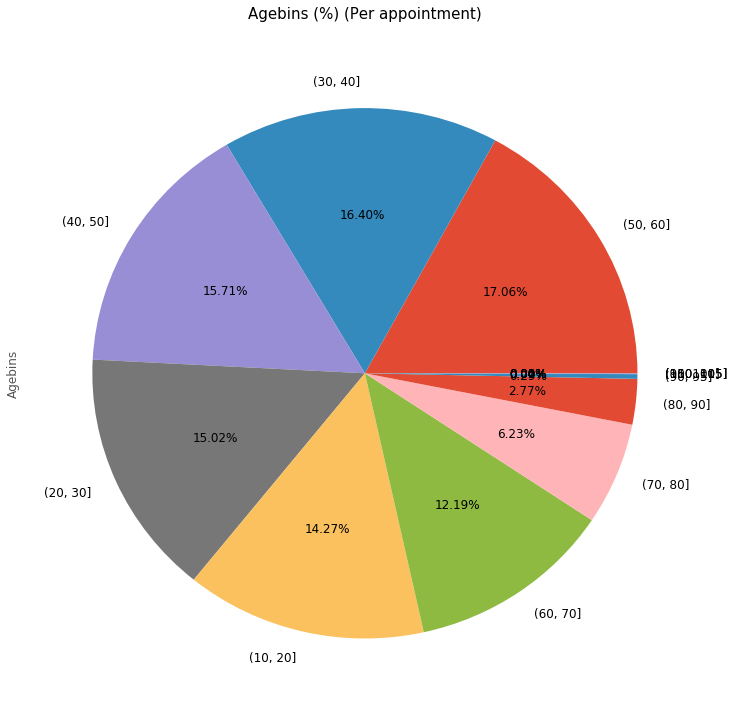

In [264]:
PropByVar(df, 'Agebins')

We should disregard ages 90 or above due to sample size.

In [265]:
df_age = df
df_age = df_age.drop(df_age.index[df_age.Age > 90])
df_age.drop('Agebins', axis=1, inplace=True)
bins = [0,  10,  20,  30]
df_age['Agebins'] = pd.cut(df_age['Age'], bins)

0      3.20
1      2.06
52     1.58
49     1.49
53     1.49
56     1.48
38     1.47
59     1.47
2      1.46
50     1.46
57     1.45
36     1.43
51     1.42
19     1.40
39     1.39
37     1.39
54     1.38
34     1.38
33     1.38
30     1.38
6      1.38
3      1.37
17     1.37
32     1.36
5      1.35
44     1.35
18     1.35
58     1.33
46     1.32
45     1.31
       ... 
72     0.56
74     0.54
76     0.52
75     0.49
78     0.49
77     0.48
80     0.46
81     0.39
82     0.35
79     0.35
84     0.28
83     0.25
85     0.25
86     0.24
87     0.17
89     0.16
88     0.11
90     0.10
92     0.08
91     0.06
93     0.05
94     0.03
95     0.02
96     0.02
97     0.01
98     0.01
115    0.00
100    0.00
102    0.00
99     0.00
Name: Age, Length: 103, dtype: float64

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


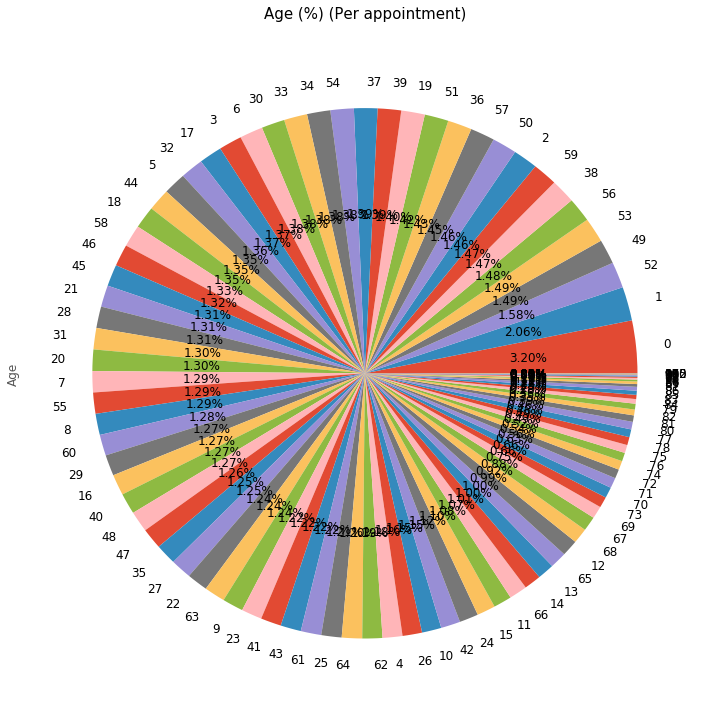

In [266]:
PropByVar(df, 'Age')

The number of no-shows for young children rises with age. For a 10-15 bin, the peak is hit, Then the rate of non-exhibition remains stable for 15 years, then steadily drops until a minimum of 60-65 years is achieved, Then for 20 years it remains relatively constant.

# How does the neighborhood effect and the no-show percentage?

In [267]:
## Let's look at the difference in sample size in some districts to get an idea
df_neighbourhood = df[['No-show_Binary', 'Neighbourhood']].groupby('Neighbourhood')['No-show_Binary'].count()
df_neighbourhood.head(40)

Neighbourhood
AEROPORTO                         8
ANDORINHAS                     2262
ANTÔNIO HONÓRIO                 271
ARIOVALDO FAVALESSA             282
BARRO VERMELHO                  423
BELA VISTA                     1907
BENTO FERREIRA                  858
BOA VISTA                       312
BONFIM                         2773
CARATOÍRA                      2565
CENTRO                         3334
COMDUSA                         310
CONQUISTA                       849
CONSOLAÇÃO                     1376
CRUZAMENTO                     1398
DA PENHA                       2217
DE LOURDES                      305
DO CABRAL                       560
DO MOSCOSO                      413
DO QUADRO                       849
ENSEADA DO SUÁ                  235
ESTRELINHA                      538
FONTE GRANDE                    682
FORTE SÃO JOÃO                 1889
FRADINHOS                       258
GOIABEIRAS                      700
GRANDE VITÓRIA                 1071
GURIGICA      

In [268]:
## Let all districts with a poor sample count first filter out.(I've set the 10 threshold)
threshold = 10
df_nb = df[['No-show_Binary', 'Neighbourhood']].groupby('Neighbourhood').filter(lambda x: len(x) > threshold)
## group by area and compute the average
df_nb = df_nb.groupby('Neighbourhood').mean()
df_nb_sorted = df_nb.reset_index().sort_values('No-show_Binary', ascending=True).set_index(['Neighbourhood'])
df_nb_sorted.head(5)



,No-show_Binary
Neighbourhood,
ILHA DO BOI,0.085714
MÁRIO CYPRESTE,0.145553
SOLON BORGES,0.147122
DE LOURDES,0.154098
DO CABRAL,0.157143


Text(3.2,0.5,'No-show percentage')

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


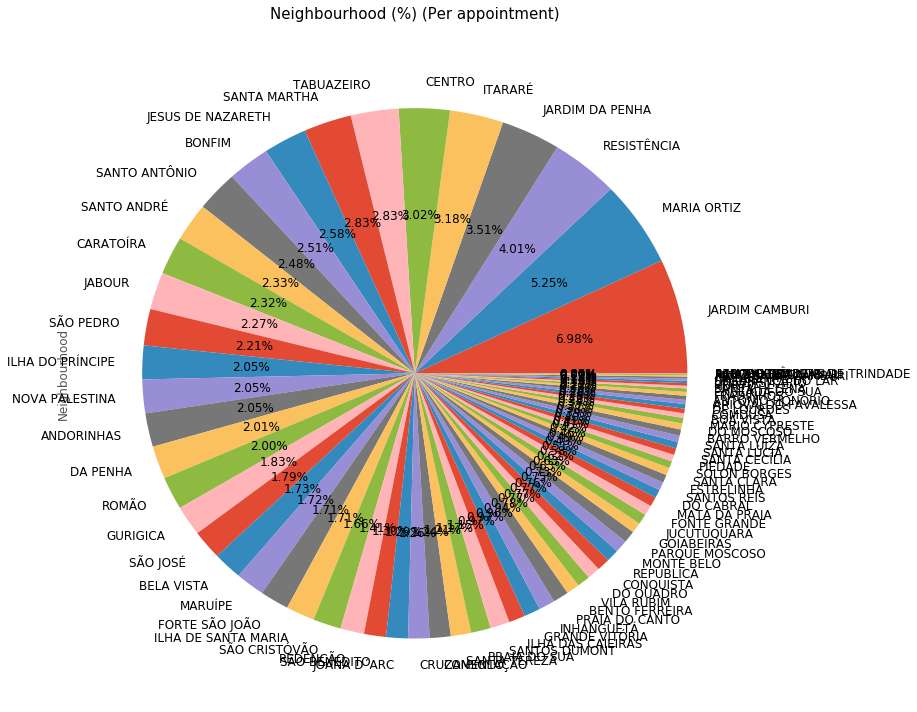

In [269]:
## We can now draw a plot
PropByVar(df, 'Neighbourhood')
plot_title = 'No-show percentage for differend neighbourhoods'
ax.set_ylabel('No-show percentage')

The neighborhood and no show percentage are strongly correlated.

# What is the effect on the no-show ratio of days between the planned date and the assigned date?

In [270]:
##Go for the first time
df['ScheduledDay'] = df['ScheduledDay'].str.slice(start=0, stop=10)
df['AppointmentDay'] = df['AppointmentDay'].str.slice(start=0, stop=10)
##Convert to date-time and deduct for days between timetable and appointment.
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['DaysBetween'] = df['AppointmentDay'] - df['ScheduledDay']
df['DaysBetween'] = df['DaysBetween'].dt.days
##community between days group
df_daysbetween = df[['No-show_Binary', 'DaysBetween']].groupby('DaysBetween').mean()
df_daysbetween.head()

,No-show_Binary
DaysBetween,
-6,1.000000
-1,1.000000
0,0.046471
1,0.213505
2,0.238216


(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


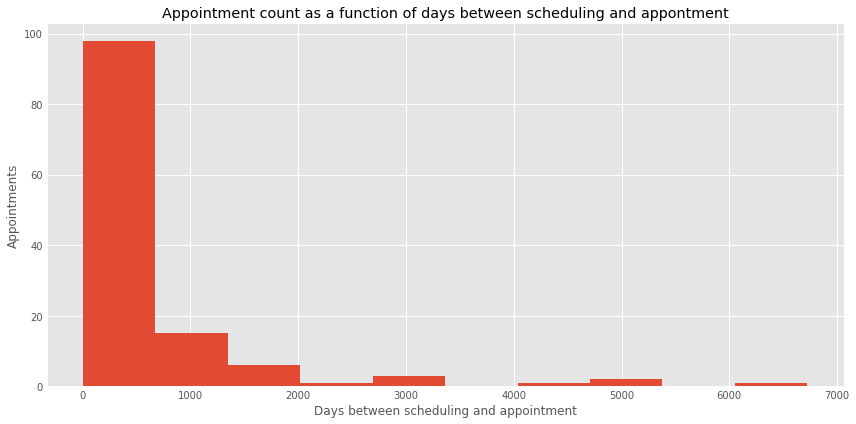

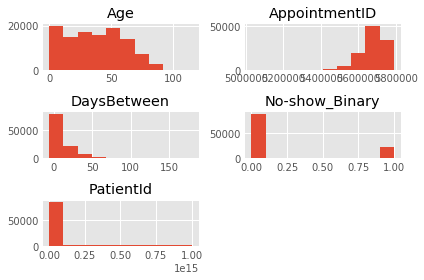

In [271]:
df_daysbetween = df.drop(df.index[df.DaysBetween < 2])
df_daysbetween = df_daysbetween[['No-show_Binary', 'DaysBetween']].groupby('DaysBetween').count()
plot_title = 'Appointment count as a function of days between scheduling and appontment'
ax = df_daysbetween['No-show_Binary'].plot(kind='hist', figsize=(12, 6), title=plot_title)
ax.set_ylabel('Appointments')
ax.set_xlabel('Days between scheduling and appointment')
df.hist()
plt.xticks(rotation=90)


While the 0-day high is apparent (the appointment on the schedule) I am now more interested in the tail, To notice a few things:
- With increasing time between appointment and schedule, the appointment count declines easily.
- The counts have a fascinating 7 day cycle (weekly).


Text(0.5,0,'Days between scheduling and appointment')

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


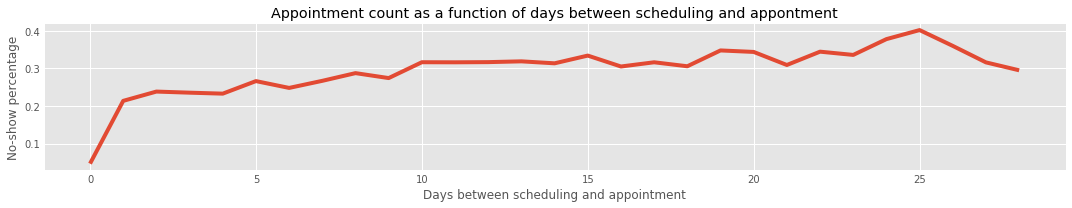

In [272]:
df_daysbetween = df.drop(df.index[df.DaysBetween < 0])
df_daysbetween = df_daysbetween.drop(df_daysbetween.index[df_daysbetween.DaysBetween > 28])
df_daysbetween = df_daysbetween[['No-show_Binary', 'DaysBetween']].groupby('DaysBetween').mean()
ax = df_daysbetween['No-show_Binary'].plot(kind='line', figsize=(15, 3), title=plot_title)
ax.set_ylabel('No-show percentage')
ax.set_xlabel('Days between scheduling and appointment')

Here we see a major change. There is no no indication of the appointment on the day of the appointment. So the proportion of no show rises exponentially. Then. The percentage of no-shows is over 30% for over 10 days.

# What is the effect on the no show ratio of the day of the week?

In [273]:
df['DayOfWeekIndex'] = df['AppointmentDay'].dt.dayofweek
df_dayofweek = df[['No-show_Binary', 'DayOfWeekIndex']].groupby('DayOfWeekIndex').mean()
df_dayofweek.head(7)

,No-show_Binary
DayOfWeekIndex,
0,0.206481
1,0.200936
2,0.196892
3,0.193541
4,0.212261
5,0.230769


2    23.40
1    23.20
0    20.55
4    17.21
3    15.60
5     0.04
Name: DayOfWeekIndex, dtype: float64

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


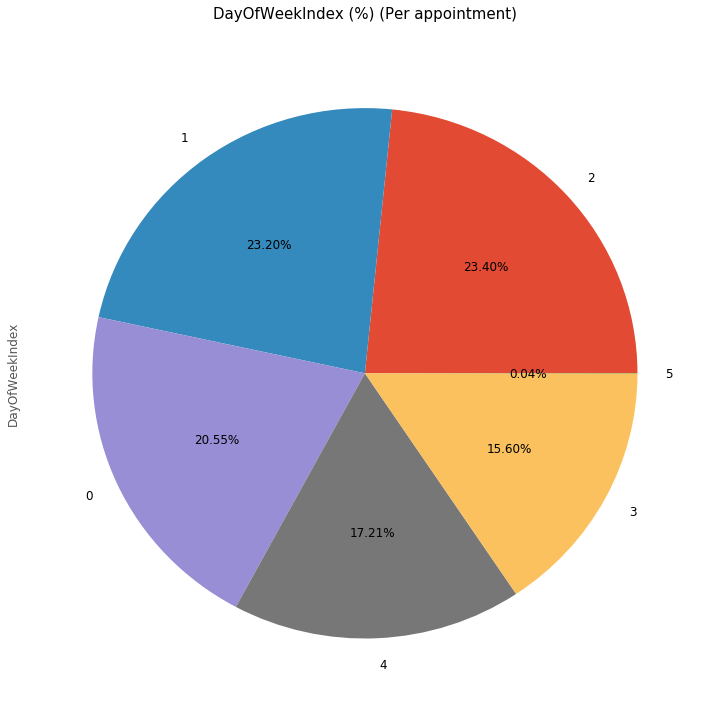

In [274]:
plot_title = 'No-show percentage by weekday'

PropByVar(df, 'DayOfWeekIndex')

0= Monday, 1= Tuseday , 2= Wednesday , 3= Tusrday , 4=Friday , 5= Saturday, On Friday there is a significantly higher rate in non-shows and on Saturday there is a large rise in no shows.

0.0    79.81
1.0    20.19
Name: No-show_Binary, dtype: float64

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


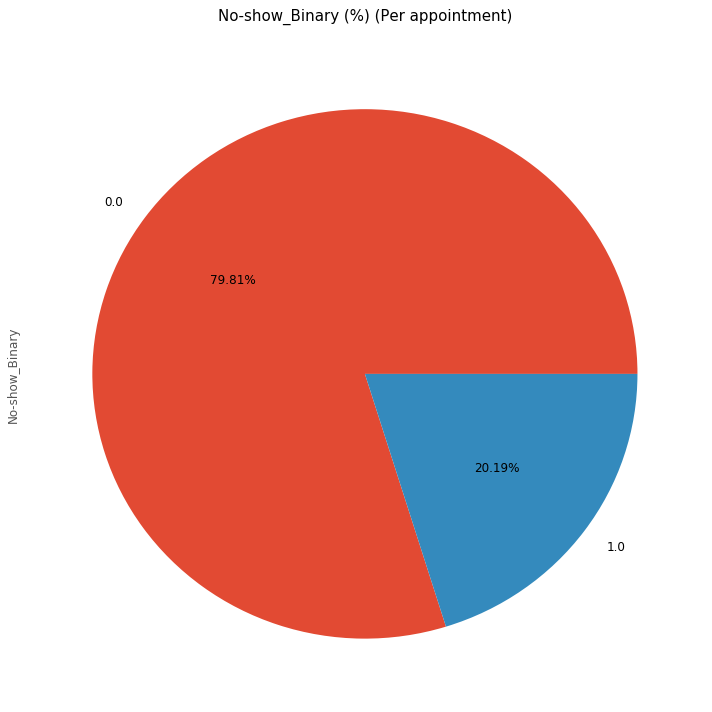

In [275]:
plot_title = 'No-show percentage by weekday'

PropByVar(df, 'No-show_Binary')

# Conclusions

The key question was What are the most significant considerations in assessing the probability of a no-show? The most important considerations were as follows:
- Period between the day of the appointment and the day of the appointment. Patients are also more likely to arrive when the visit is set for the same day.
- The Neighborhood: This ranged from 9 percent for ILHA DO BOI to 29 percent for SANTOS DUMONT.
- Received SMS: Patients receiving SMS received a no-show rate of 27 per cent vs. 20 per cent overall.
Smaller results were observed on the day of the week the age of the patient's hypertension and diabetes.
For more research, it would be important to know the average travel time for a patient to get to the clinic in each community since the neighborhood has such a strong effect on the no-show percentage.
The further disadvantage is that certain factors have only been re-recented in a 1 or 0. For eg, 27 per cent of patients who got SMS are no-show patients vs. 20 per cent overall. In 32% of visits, the patient got an SMS. 
It would be important to know why these patients had got an SMS. If these patients were accustomed to not being at prior appointments, that would explain why the no-show rate is so much higher for SMS recipients, But all we've got is 1 or 0.
The proportion is clearely biased against women 64 percent vs 35 percent , But as the no-show rate under man and woman is almost equal this would have little impact on the overal sample.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [232]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0